# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Шаг 1. Откройте файл с данными и изучите общую информацию


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10) # открыла датафрейм

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Шаг 2. Подготовьте данные


- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


Изменила на нижний регистр названия столбцов

In [3]:
for i in data.columns:
    data.columns = data.columns.str.replace(i, i.lower())
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum()# посчитала колличество пропущенных значений в каждом столбец

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# проверила все уникальные значения в столбце user_score
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# проверю количество  значений tbd
data[data['user_score'] == 'tbd']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значений tbd очень много в столбце. Аббревиатуру 'tbd' означает "быть определённым", т.е. значение еще не определено и оценка не выставленна пока что, поэтому решила заменить на NaN, ведь в столбце должны быть только числовые значения. Изменила тип столбца 'User_Score' с object на float64, т.к. в нем лежат числовые значения. 

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # заменила столбец с object на float64


In [9]:
data['user_score'].unique() # проверила, что не осталось значения tbd

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заменила все столбцы, где хранятся данные типа object на нижний регистр

In [11]:
for col_name in data.columns:
    if data.dtypes[col_name] == 'object':
        data[col_name] = data[col_name].str.lower()
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверка на нееявные дубликаты

In [12]:
data.duplicated(subset= ['name', 'platform']).sum() #проверила на неявные дубликаты

5

In [13]:
data.drop_duplicates(subset = ['name', 'platform'],inplace = True) # удалила дубликаты


In [14]:
data.duplicated(subset= ['name', 'platform']).sum() #проверила на неявные дубликаты

0

In [15]:
data.duplicated(subset= ['name', 'year_of_release']).sum() #проверила на неявные дубликаты

4283

**Комментарий**
Удалила удаление, но тогда у меня возникает вопрос, как тогда определить, что дубликат полный и не будет так сильно изменять датафрейм? В прошлой работе ревьюрер мне ответил, что достаточно применить метод duplicated(), но оказывается он вызывает порой такие проблемы.

In [16]:
data.duplicated(subset= ['name', 'year_of_release']).sum() #проверила на неявные дубликаты

4283

In [17]:
data.shape

(16710, 11)

Проверка пропушенных значений 

In [18]:
data.isnull().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Проверила пропуск по столбцу name, он всего 1. Большой смысловой нагрузки он не несет, можно удалить

In [19]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [20]:
data.dropna(subset = ['name'], inplace = True)
data.isnull().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [21]:
data[data['year_of_release'].isnull()] # Проверила на пропуски столбец  year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,NaN,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Я считаю, что данные пропуски тоже стоит удалить потому что:
- незаполненные данные будут мещать дальнейшему анализу
- одни и теже игры на разных платформах могут выходить в разное время, а так же они обновляться или выходить римейки игры. Я не смогу узнать когда именно выпустилась каждая игра на определенной платформе и заполнять года выпуска таким же годом выпуска, как на других платформах считаю неправильным, т.к. эти года могут отличатся

In [22]:
data.dropna(subset = ['year_of_release'], inplace = True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [23]:
data.shape

(16441, 11)

Перевела год в тип int64, т.к. год это целое число.

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заменила все пропуски в столбце rating на nothing

In [25]:
data['rating'] = data['rating'].fillna('nothing')
data['rating'].value_counts()

nothing    6676
e          3920
t          2903
m          1536
e10+       1393
ec            8
k-a           3
rp            1
ao            1
Name: rating, dtype: int64

Заменять остальные пропуски не вижу смысла, т.к. в столбцах critic_score и user_score перечисленны оценки, которые выставили пользователи и критики. Скорей всего, компьютерные игры еще не были оценены и заменять эти значения на среднее или медианное будет не честно, а для удадения слишком большие значения. Поэтому решила постаивть 'заглушку', для того чтобы было удобней работать с даннымыми.

In [26]:
# решила заменить все пропуски, чтобы в последнем пункте проекта Nan не мешал считать дисперсию))
data['user_score'] = data['user_score'].fillna(-0.1)
data['critic_score'] = data['critic_score'].fillna(-0.1)
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Создала новый столбец с суммарными продажами во всех регионах.

In [27]:
colm = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[colm].sum(axis= 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-0.1,-0.1,nothing,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-0.1,-0.1,nothing,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-0.1,-0.1,nothing,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-0.1,-0.1,nothing,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-0.1,-0.1,nothing,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-0.1,-0.1,nothing,0.01


**Вывод:**

Провела подробный анализ структуры данных, заполнила все возможные пропуски и удалида те, в которых нет возиожности изменить и они бы мешали анализу и составлению выводов по датафрейму.

# Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**1. Сгруппировала данные по столбцам name и year_of_release, чтобы понять сколько игр было выпущено в разные года**

In [28]:
year_of_release_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot.columns = ['game_count'] 
year_of_release_pivot


,game_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количетсво выпускаевых игр')

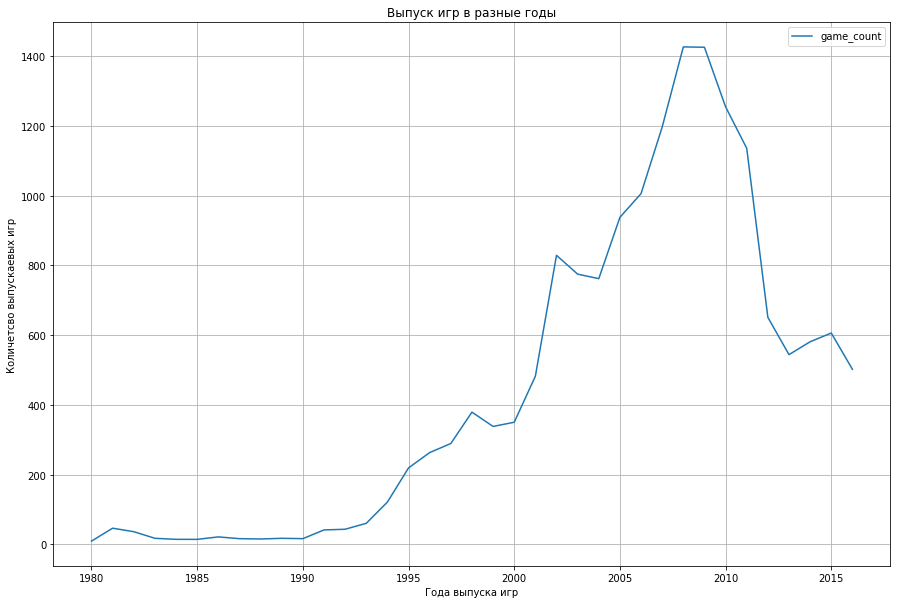

In [29]:
year_of_release_pivot.plot(figsize = (15,10), grid= True)
plt.title('Выпуск игр в разные годы')
plt.xlabel('Года выпуска игр')
plt.ylabel("Количетсво выпускаевых игр")

**Вывод**:

По графику видно, что рост производства игор начался с 1995 года. До этого времени развитие компьютерных технологий только набирали обороты и разрабатывались в небольшом колличестве стран. В середине 90-х начали появлться первые игровые - компьютерные платформы и начали развиваться первые игровые империи. Пик производства попадает на 2007 - 2009 годы, когда было мало ограничений на развитие, не было санкций и кризисов, технологии и интернет делают большой скачек в развитии. ("Верни мне мой 2007, где все спокойно и нету войн")))) В последующие года начинается спад производства игр, но в большинстве случаев это связано не только с кризисами в мире, но и с тем, что игры стали делать более качетвенно (с наилучшей графикой, продуманным сюжетом и лучшим движком) и их производства стало занимать намного больше времени (одна игра может разрабатываться годами). 

**2. Выгрузила таблицу с платформами и общими продажами по миру. По таблице видно, что самыми популярными являются первые 6, по остальным продажи резко падают или являются минимальными. Считаю, что не стоит их брать их в расчет для ответа на поставленный вопрос.**

In [30]:
platform_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
platform_pivot

,total_sales
platform,
ps2,1233.56
x360,959.99
ps3,931.33
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Для проведения анализа отфильтровала те платформы, где суммарное колличество продаж меньше 700.

In [31]:
platform_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
platform_pivot.drop(index=platform_pivot.query('total_sales < 700').index,inplace=True)
platform_pivot.reset_index()

,platform,total_sales
0,ps2,1233.56
1,x360,959.99
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58


In [32]:
# сделала список из 6 самых популярных платформ для дальнейшего построения графиков
platforms_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
platforms_list

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

Выпуск 1 консоли в 1985 году, скорей всего ошибка, думаю, стоит удалить эту строку

In [33]:
# посмотрела какое количество ошибочных строк и номер индекса для удаления
data[(data['platform']=='ds') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-0.1,-0.1,nothing,0.02


In [34]:
data = data.drop(index=[15957]).reset_index(drop=True) 
# удалида строку по индексу и нормализовала индексацию в датафрейме

In [35]:
data[data['year_of_release'] == 1985] # проверила удаление

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-0.1,-0.1,nothing,40.24
373,kung fu,nes,1985,action,1.64,0.38,1.42,0.06,-0.1,-0.1,nothing,3.50
858,soccer,nes,1985,sports,0.18,0.23,1.53,0.02,-0.1,-0.1,nothing,1.96
1249,ice climber,nes,1985,platform,0.46,0.10,0.92,0.02,-0.1,-0.1,nothing,1.50
1468,gyromite,nes,1985,puzzle,0.73,0.16,0.40,0.03,-0.1,-0.1,nothing,1.32
1949,tag team match m.u.s.c.l.e.,nes,1985,fighting,0.00,0.00,1.05,0.00,-0.1,-0.1,nothing,1.05
1987,bomberman,nes,1985,puzzle,0.18,0.00,0.85,0.00,-0.1,-0.1,nothing,1.03
2038,1942,nes,1985,shooter,0.65,0.14,0.21,0.00,-0.1,-0.1,nothing,1.00
2223,balloon fight,nes,1985,platform,0.39,0.09,0.43,0.01,-0.1,-0.1,nothing,0.92
3850,wrecking crew,nes,1985,platform,0.00,0.00,0.51,0.00,-0.1,-0.1,nothing,0.51


Решила сделать график по каждой платформе, где распределяются мировые продажи по годам и понять как менялись продажи по платформам.

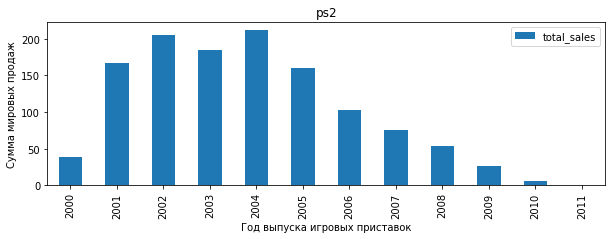

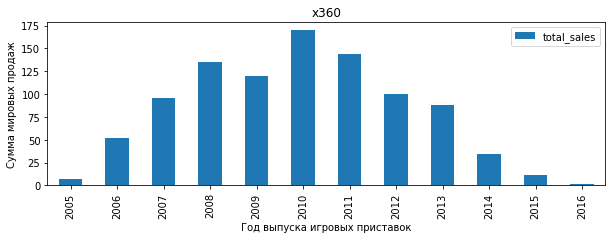

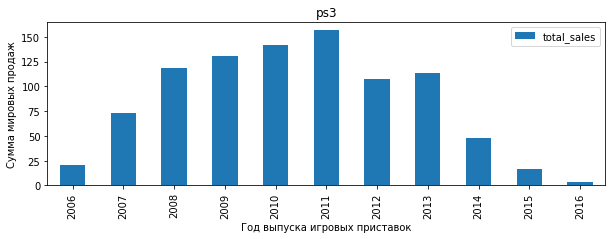

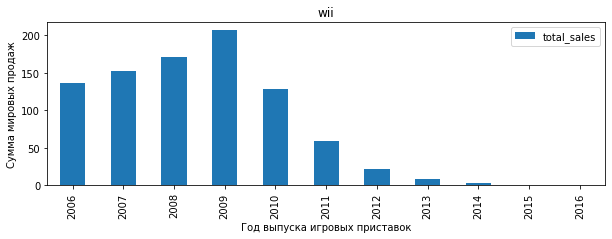

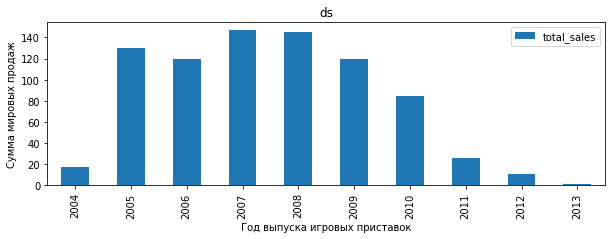

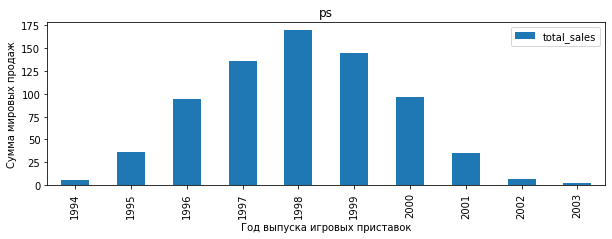

In [36]:
for pl in platforms_list:
    data[data['platform'] == pl].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(10,3))
    plt.title(pl)
    plt.xlabel('Год выпуска игровых приставок')
    plt.ylabel("Сумма мировых продаж")
    plt.show(pl)



**Вывод:**

Большинство популярных платформ появились в период с 2000 по 2006 гг., исключением является ps, она была создана в середине 90х и радовала своих пользователей аж до начала 2000х. Все платформы живут на рынке в среднем от 8 до 10 лет. Самой быстро теряющей популярность оказалась wii (возможно потому что вышла новая платформа этой же фирмы), но а дольше всего жили ps2, x360 и ps3. Все рассматривемые платформы были выпущены примерно в одно и тоже время и существовали до середины 2010х годов. После 2015года все платформы почти потеряли новых пользователей.


**3. Взяла для анализа данные по платформам с 2013 по 2016. Считаю, что за более долгий срок не стоит брать показатели, т.к. те платформы, которые выпустились до 2013 года уже начинают терять свою рентабельность.**  

In [37]:
# создала новый датафрейм, где сделала фильтрацию по годам выпуска платформ с 2013года
new_per = data[data['year_of_release'] >= 2013] 


In [38]:
platform_year = new_per.groupby('platform').agg({'total_sales': 'sum'})\
.sort_values(by='total_sales', ascending=False).reset_index()
platform_year


,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,39.43
7,psv,32.99
8,wii,13.66
9,psp,3.50


In [39]:
platforms_list_year = platform_year['platform'].unique()
platforms_list_year
# сделала список из платформ, чтобы построить графики


array(['ps4', 'ps3', 'xone', '3ds', 'x360', 'wiiu', 'pc', 'psv', 'wii',
       'psp', 'ds'], dtype=object)

Построила графики, чтобы посмотреть, какие платформы лидируют в продажах с 2013 года, как растет их стоимость и падает

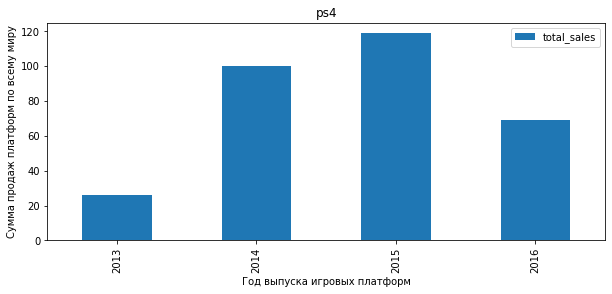

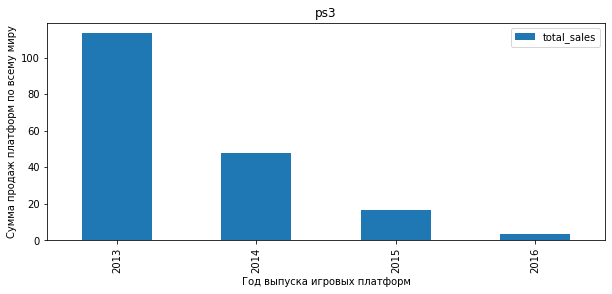

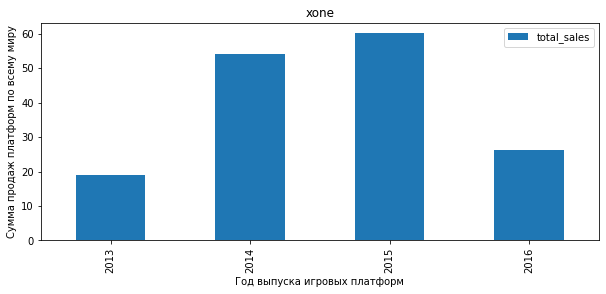

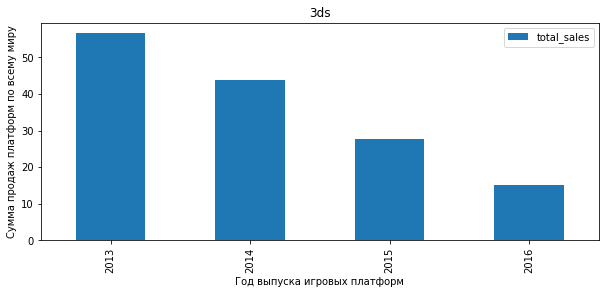

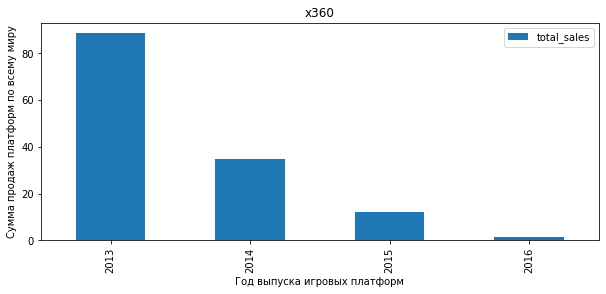

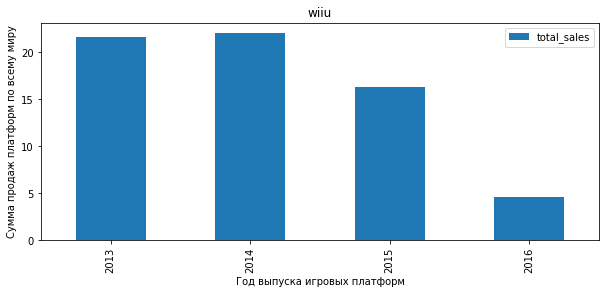

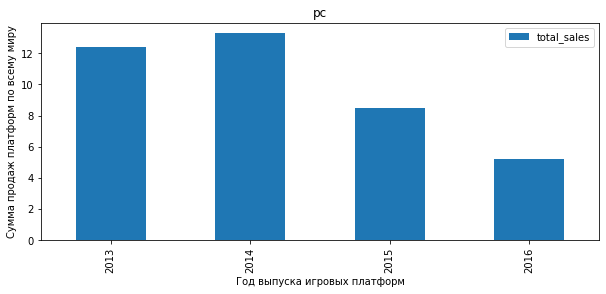

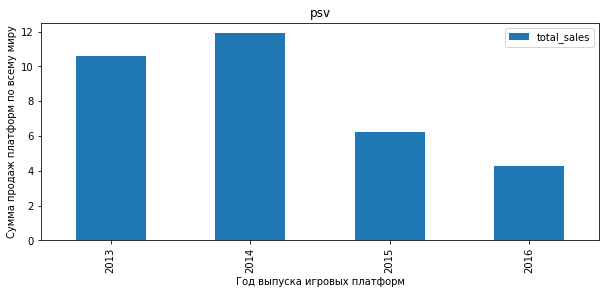

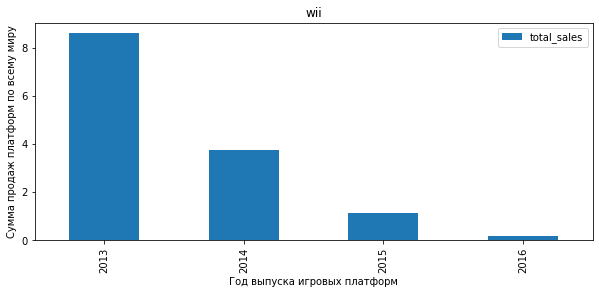

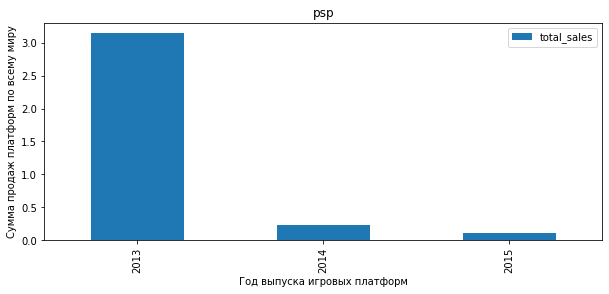

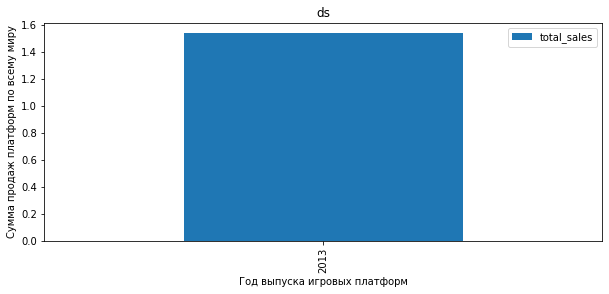

In [40]:
for ye in platforms_list_year:
    new_per[new_per['platform'] == ye].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(10,4))
    plt.title(ye)
    plt.xlabel('Год выпуска игровых платформ')
    plt.ylabel("Сумма продаж платформ по всему миру")
    plt.show(ye)

**Вывод:**

Лидируют в продажах игровые платформы: ps4, ps3, xone, 3ds, x360, wiiu.


Актуальные приставки на 2016 год, которые не потеряли продажи к этому времени

In [41]:
platform_year = data[data['year_of_release'] >= 2016].groupby('platform').agg({'total_sales': 'sum'})\
.sort_values(by='total_sales', ascending=False).reset_index()
platform_year.head(5)

,platform,total_sales
0,ps4,69.25
1,xone,26.15
2,3ds,15.14
3,pc,5.25
4,wiiu,4.60


Text(0.5, 1.0, 'Продажи игровых платформ с 2013 года')

<Figure size 1080x720 with 0 Axes>

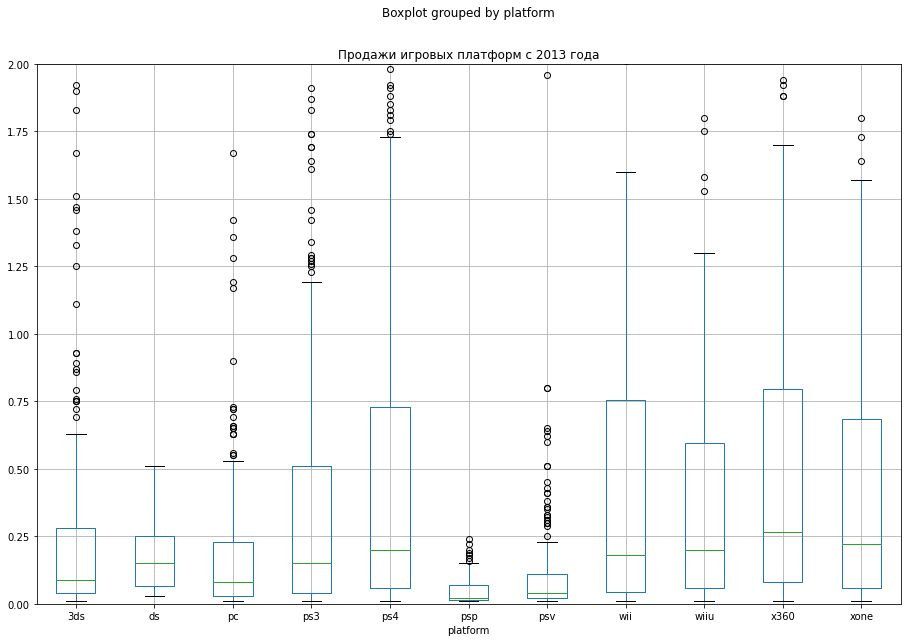

In [42]:
plt.figure(figsize=(15,10))
top_platform = new_per.boxplot('total_sales',by='platform', figsize=(15,10))
plt.ylim(0, 2)
plt.title('Продажи игровых платформ с 2013 года')


In [43]:
top_platform = new_per.groupby('platform')['total_sales']
top_platform.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
pc,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
psp,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
psv,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Лидерами стали ps4, ps3, xone, 3ds, x360, wiiu в 2013 году они либо только выходят на рынок и имеют рост в продаж в ближайшие годы, либо имеют пиковые значения по продажам. Заметна сменяемость платформ одной фирмы, например, PS, которая продолжает свои серии в ps2, ps3, ps4 примерно раз в 6 лет. Так же наблюдается спад по продажам к 2016 году по всем платформам. Но можно выделить ТОР-5 платформ, которые имеют неплохие продажи в 2016 году и будут актуальны для продаж в 2017, это: ps4,xone, 3ds, pc, wiiu.	

**4. Необходимо оценить как влияют на продажи внутри самой популяной платформы отзывы пользователей и критиков, затем посчитать  корреляция между оценками пользователей и продажами** 


In [44]:
ps4 = new_per[(new_per['platform']=='ps4') & (new_per['user_score'] > 0)]  #влияние оценки пользователей
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

**Комментарий**

Испраила, перенесла в начало создание нового дата фрейма с отфильтрованным годов

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

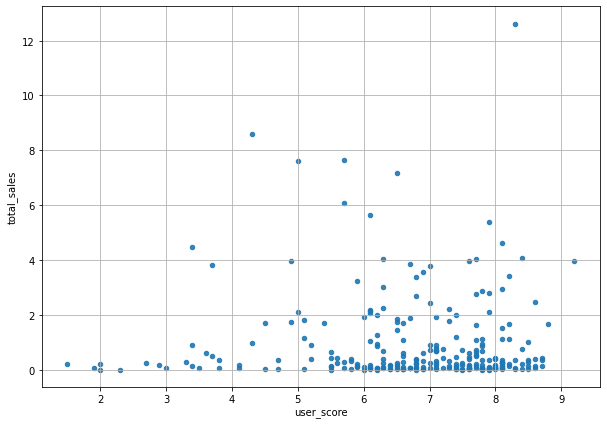

In [45]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(10,7), grid = True)

In [46]:
ps4 = new_per[(new_per['platform']=='ps4') & (new_per['critic_score'] > 0)] # влияние оценки критиков
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

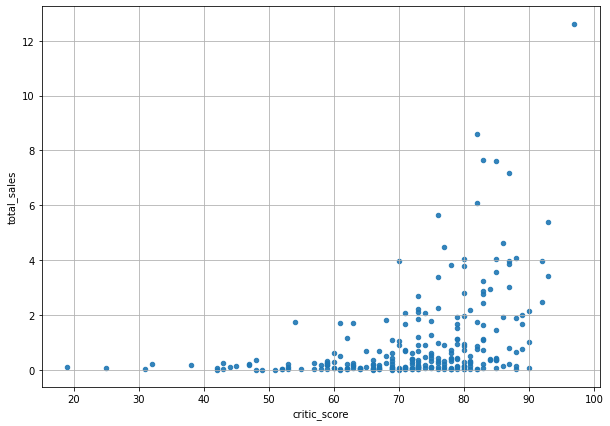

In [47]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(10,7), grid = True)

**Выводы:**

По исследованию видно, оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами игровых платформ, всего 40%. Оценки пользователей корреляции с продажами не имеют

**Коментарий**

Исправила, добавила фильтр, чтобы искоючить выброс из-за загрушки 

**5. Оценим как влияют на продажи остальных лидирующих платформ отзывы пользователей и критиков, затем посчитать корреляция между оценками пользователей и продажами**

In [48]:
ps3 = new_per[(new_per['platform']=='ps3') & (new_per['user_score'] > 0)] #влияние оценки пользователей
ps3['user_score'].corr(ps3['total_sales'])

0.0023944027357566925

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

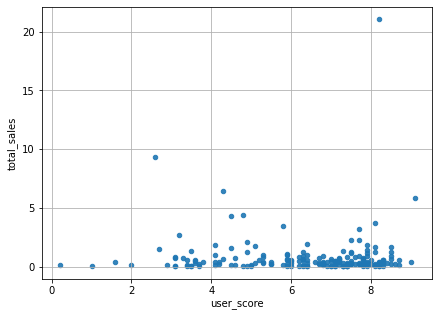

In [49]:
ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [50]:
ps3 = new_per[(new_per['platform']=='ps3') & (new_per['critic_score'] > 0)] # влияние оценки критиков
ps3['critic_score'].corr(ps3['total_sales'])

0.3342853393371919

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

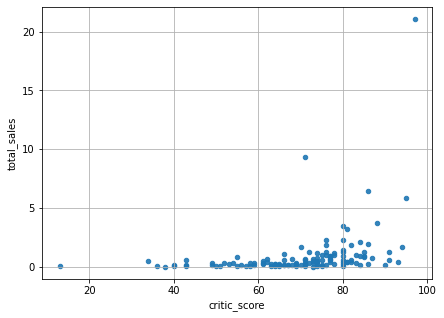

In [51]:
ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [52]:
xone = new_per[(new_per['platform']=='xone') & (new_per['critic_score'] > 0)]  #влияние оценки пользователей
xone['user_score'].corr(xone['total_sales'])

-0.007863726416033019

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

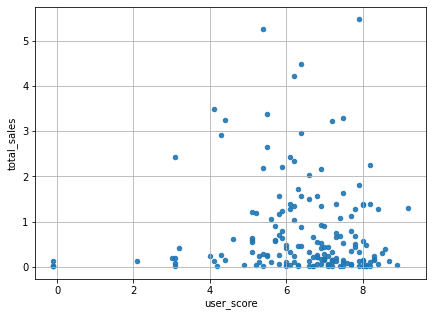

In [53]:
xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [54]:
xone = new_per[(new_per['platform']=='xone') & (new_per['critic_score'] > 0)] # влияние оценки критиков
ps3['critic_score'].corr(ps3['total_sales'])

0.3342853393371919

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

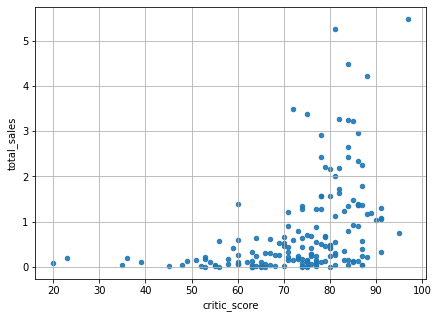

In [55]:
xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [56]:
ds3 = new_per[(new_per['platform']=='3ds') & (new_per['user_score'] > 0)] #влияние оценки пользователей
ds3['user_score'].corr(ds3['total_sales'])

0.24150411773563016

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

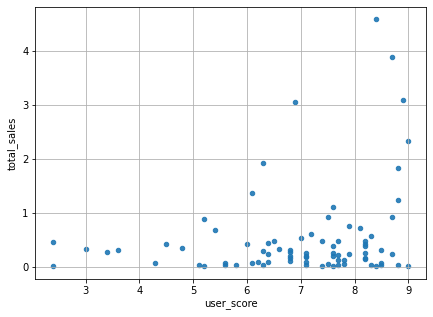

In [57]:
ds3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [58]:
ds3 = new_per[(new_per['platform']=='3ds') & (new_per['critic_score'] > 0)] # влияние оценки критиков
ds3['critic_score'].corr(ds3['total_sales'])

0.3570566142288103

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

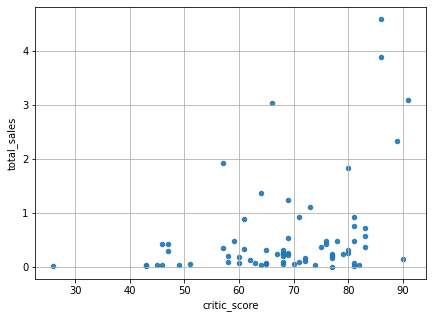

In [59]:
ds3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [60]:
x360 = new_per[(new_per['platform']=='x360') & (new_per['user_score'] > 0)] #влияние оценки пользователей
x360['user_score'].corr(x360['total_sales'])

-0.011742185147181342

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

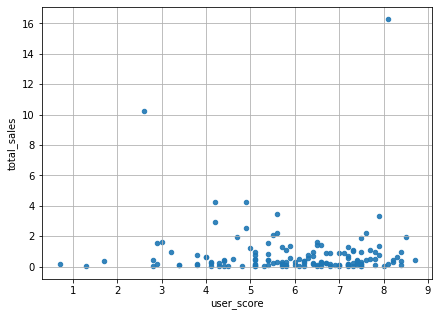

In [61]:
x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

In [62]:
x360 = new_per[new_per['platform']=='xone'] # влияние оценки критиков
x360['critic_score'].corr(x360['total_sales'])

0.2747324899602825

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

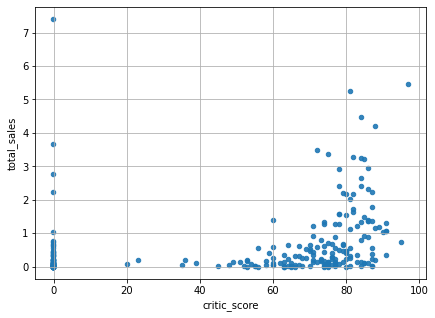

In [63]:
x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(7,5), grid = True)

**Вывод:**
    
Исходя из графиков видно; что большая часть оценок критиков расположена в диапазоне 50 - 85, оценки пользователей 5 - 8,5. Оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами игровых платформ от 30% до 50% Оценки пользователей корреляции с продажами почти имеет очень маленткое влияние, в спелнем 10%

**Комментарий**

Исправила

**6. Посмотрим продажи игр по всем платформам**

In [64]:
genre_all = data.pivot_table(index='genre', values='total_sales').sort_values('total_sales', ascending=False)
genre_all

,total_sales
genre,
platform,0.940262
shooter,0.803519
role-playing,0.628683
racing,0.590000
sports,0.568182
fighting,0.528865
action,0.519208
misc,0.459204
simulation,0.452695


**Комментарий**

убрала фильтрацию по сумме мировых продаж, данные резко поменяли свой смысл)

Text(0, 0.5, 'Количетсво купленных игр')

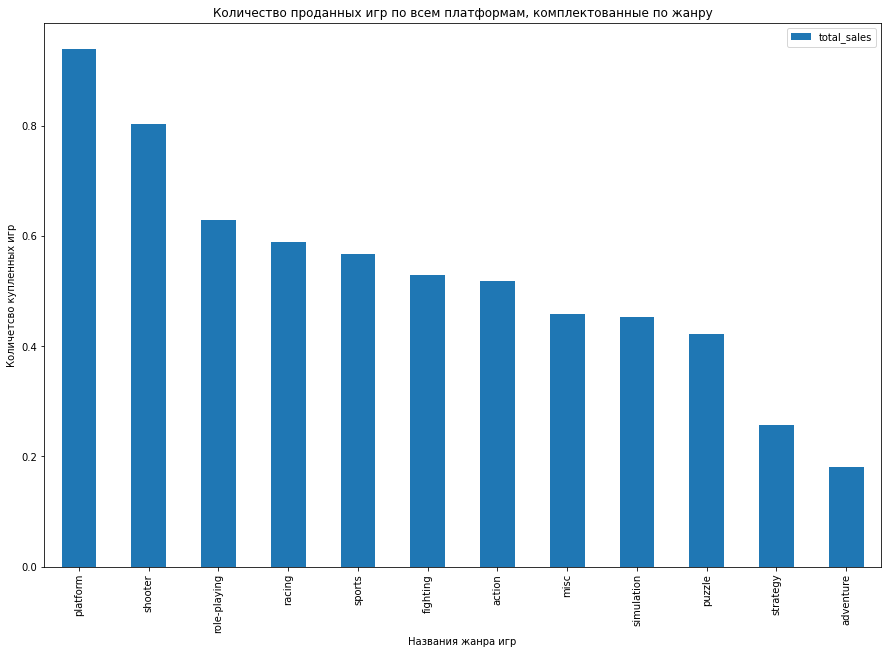

In [65]:
genre_all.plot(kind='bar', figsize=(15,10))

plt.title('Количество проданных игр по всем платформам, комплектованные по жанру')
plt.xlabel('Названия жанра игр')
plt.ylabel("Количетсво купленных игр")


По графику видно, что самые высокие продажи у игр жанра platform, за ними по популярности идут игры жанров shooter и racing. Самыми не популярными оказались игры жанры adventure	и strategy, ну это и понятно, на приставках играть в стртегии не удобно)

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**1.Самые популярные платформы(топ-5)**

In [66]:
na_pl = new_per.groupby(by='platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_pl# топ-5 популярных платформ в Северной Америке

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20


In [67]:
eu_pl = new_per.groupby(by='platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)\
.head(5)
eu_pl # топ-5 популярных платформ в Европе

,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


In [68]:
jp_pl = new_per.groupby(by='platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_pl# топ-5 популярных платформ в Японии

,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88


In [69]:
toppl_5 = na_pl.merge(eu_pl, on = 'platform', how='left')
top_pl5 = toppl_5.merge(jp_pl, on = 'platform', how='left')
top_pl5.reset_index()

,platform,na_sales,eu_sales,jp_sales
0,ps4,108.74,141.09,15.96
1,xone,93.12,51.59,NaN
2,x360,81.66,42.52,NaN
3,ps3,63.50,67.81,23.35
4,3ds,38.20,30.96,67.81


Text(0, 0.5, 'Количетсво купленных игровых платформ')

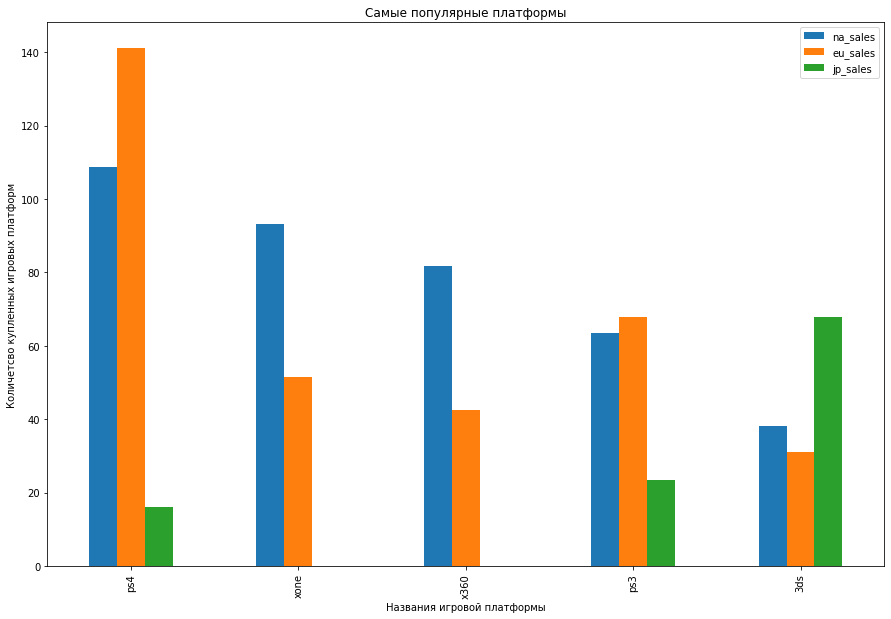

In [70]:
top_pl5.plot(kind='bar',figsize=(15,10))
plt.title('Самые популярные платформы')
plt.xlabel('Названия игровой платформы')
plt.ylabel("Количетсво купленных игровых платформ")

Вывод:По таблицам видно, что популярными во всех странах является ps3, 3ds (занимает в Японии лидирующее место) и ps4 (лидирует в продаваж по Америке и Европе). Так же в Европе и Америке полностью схожи предпочтения в игровых консолях, за исключением небольшой разницы в общей сумме выкупа их.

**2. Самые популярные жанры (топ-5)**

In [71]:
na_g = new_per.groupby(by='genre').agg({'na_sales': 'median'}).sort_values(by='na_sales', ascending=False).head(5)
na_g # топ-5 популярных платформ в Северной Америке

,na_sales
genre,
shooter,0.200
platform,0.090
sports,0.080
fighting,0.045
racing,0.030


In [72]:
eu_g = new_per.groupby(by='genre').agg({'eu_sales': 'median'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_g # топ-5 популярных платформ в Европе

,eu_sales
genre,
shooter,0.190
platform,0.080
racing,0.060
sports,0.050
simulation,0.035


In [73]:
jp_g = new_per.groupby(by='genre').agg({'jp_sales': 'median'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_g # топ-5 популярных платформ в Японии

,jp_sales
genre,
role-playing,0.05
fighting,0.03
misc,0.02
puzzle,0.02
action,0.01


In [74]:
topg_5 = na_g.merge(eu_g, on = 'genre', how='left')
top_g5 = topg_5.merge(jp_g, on = 'genre', how='left')
top_g5.reset_index()

,genre,na_sales,eu_sales,jp_sales
0,shooter,0.200,0.19,NaN
1,platform,0.090,0.08,NaN
2,sports,0.080,0.05,NaN
3,fighting,0.045,NaN,0.03
4,racing,0.030,0.06,NaN


Text(0, 0.5, 'Количетсво купленных игровых платформ')

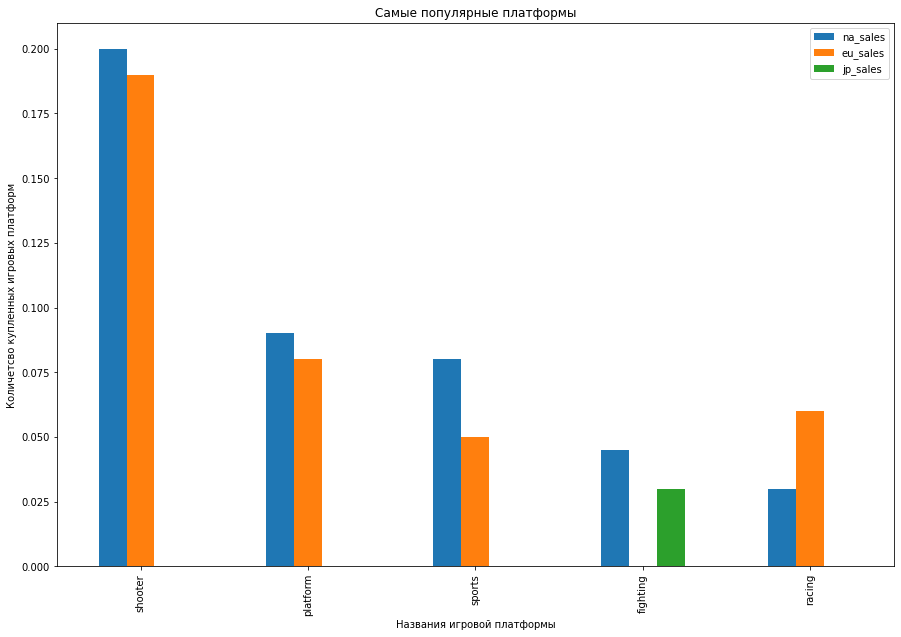

In [75]:
top_g5.plot(kind='bar',figsize=(15,10))
plt.title('Самые популярные платформы')
plt.xlabel('Названия игровой платформы')
plt.ylabel("Количетсво купленных игровых платформ")

**Вывод:**

В Северной Америке и Европе предпочтения в жанрах полностью схожи за исключением одного - в Европе любят погонять на тачках, а в Америке поиграть в подраться. Менталитет жителей схож и поэтому такой одинаковый выбор. А вот в Япони совершенно все иначе: очень они любят ролевые игры, музыкальные, пазлы и экшены. Но в одном они схожи с америкацами - драчки)

**3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [76]:
na = new_per.groupby(by='rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na # рейтинг ESRB по Северной Америке

,na_sales
rating,
m,165.21
nothing,89.42
e,79.05
e10+,54.24
t,49.79


**Крмментарий**

В предобработке данных изменила все пропуски на nothing и теперь не теряются игры без рейтинга

In [77]:
eu = new_per.groupby(by='rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu # рейтинг ESRB по Европе

,eu_sales
rating,
m,145.32
e,83.36
nothing,78.91
e10+,42.69
t,41.95


In [78]:
jp = new_per.groupby(by='rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp # рейтинг ESRB по Японии

,jp_sales
rating,
nothing,85.05
t,20.59
e,15.14
m,14.11
e10+,5.89


In [79]:
esrb1 = na.merge(eu, on = 'rating', how='left')
esrb = esrb1.merge(jp, on = 'rating', how='left')
esrb.reset_index()

,rating,na_sales,eu_sales,jp_sales
0,m,165.21,145.32,14.11
1,nothing,89.42,78.91,85.05
2,e,79.05,83.36,15.14
3,e10+,54.24,42.69,5.89
4,t,49.79,41.95,20.59


<AxesSubplot:title={'center':'Влияние рейтинга ESRB на продажи'}, xlabel='rating'>

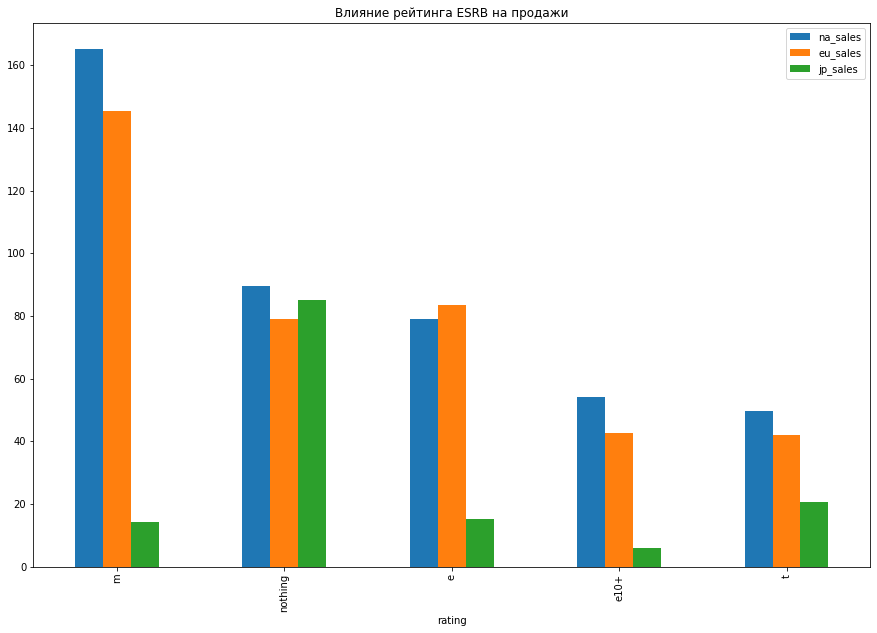

In [80]:
esrb.plot(kind='bar',figsize=(15,10), title='Влияние рейтинга ESRB на продажи')

**Вывод:**

По графику видно, что в Северной Америке и Европе рейтинг esrb имеет сильное влияние на покупки. Большинство продаж у игр для лиц старше 17 лет и всех возрастных категорий, для детей покупают не так много игр)) А в Японии рейтинг почти никак не влияет на количество продаж, хотя это может быть из-за того, что у них просто другая система возростной оценки, а по ESRB оценено не так много игр.

# Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

**1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые или разные?**

*Гипотезы:*
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные

**Комментарий**

Добаила фильтр и теперь заглушенные данные не мешают))


In [81]:
ps = (new_per['user_score'] > 0).loc[new_per['platform'] == 'pc']
ps.mean() #средний рейтинг по платформе  ps

0.8201058201058201

In [82]:
xone = (new_per['user_score'] > 0).loc[new_per['platform'] == 'xone']
xone.mean() #средний рейтинг по платформе xone

0.7368421052631579

In [83]:
alpha = 0.05 # критический уровень статистической значимости

In [84]:
results = st.ttest_ind(ps, xone)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.03981358558167057
Отвергаем нулевую гипотезу


**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные или одинаковые?**

*Гипотезы:*
- Н0: Средние пользовательские рейтинги жанров Action и Sports разные
- Н1: Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [85]:
action = (new_per['user_score'] > 0).loc[new_per['genre'] == 'action']
action.mean() #средний рейтинг по жанру action

0.5078328981723238

In [86]:
sports = (new_per['user_score'] > 0).loc[new_per['genre'] == 'sports']
sports.mean() #средний рейтинг по жанру sports

0.7476635514018691

In [87]:
alpha = 0.05 # критический уровень статистической значимости

In [88]:
results = st.ttest_ind(ps, xone)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.03981358558167057
Отвергаем нулевую гипотезу


# Шаг 6. Общий вывод

Перед тем как произвести анализ и понять какие же игры на популярные игровые платфомы будут хорошо востребованы в  интернет-магазине «Стримчик» в 2017 году, я подготовила данные:
- Заменила названия столбцов 
- Преобразовала данные в нужные типы
- Обработала пропуски 
- Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец total_sales
Затем проанализировала датасет и ответила на вопросы:
- Сколько игр выпускалось в разные годы
- Посмотрела как менялись продажи по игровым платформам. Выберала платформы с наибольшими суммарными продажами
- Проверила какие платформы лидируют по продажам (растут или падают). Выберала несколько потенциально прибыльных платформ.
- Посмотрела как влияют на продажи внутри популярныъёх платформ отзывы пользователей и критиков
- Посмотрела на общее распределение игр по жанрам.Выделила жанры с высокими и низкими продажами
- Определила ТОП - 5 популярных игровых платформы и жанров


Во время анализа проекта было выяснено:
- Игровая индустрия начала свою деятельность в 1985 году и начала активно развиваться с середины 1990х годов. Пик производства попадает на 2007 - 2009 годы, когда было мало ограничений на развитие, не было санкций и кризисов, технологии и интернет делают большой скачек в развитии.  
- В среднем игровая приставка живет на рынке от 8 - 10 лет и ее обычно заменяет новая "редакция" той же фирмы
- Продажи по всем игровым приставкам сильно снижаются после 2015 года
- Покупатели почти не обращают внимание на оценки пользователей, опиратся в основном на мнение критиков
- Самыми не популярными жанрами стали  simulation, puzzle, adventure и strategy, скорей всего потому что в них неудобно играть на приставках.	
Были вылвинуты 2 гипотезы по рейтингу и я пришла к выводам:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Прогноз по продаже игр на 2017 таков согласно портрету пользователей:

Самыми популярными платформами, для которых стоит продавать игры в 2017 году, стали: ps4, xone, 3ds, ps, wiiu, они не сильно упали в продажах за последние годы и хорошо продаются в рассматриваемых в проекте регионах(Северная Америка, Европа и Япония). Самые популярные жанры игр по этим регионам: shooter, platform, racing,sports, fighting. Если рассматвать отдельно Японию, то там жанры будут сильно отличатся от любимых европейцами и американцами: misc и fighting role - playing, puzzle, action и любимой платформа является - 3ds. А в Северной Америке и Европе популярны платформы ps4, xone, ps3, x360, 3ds . Больше всего игры покупают взрослые для себя, детский контент не столь актуален. 

**Комментарий**
Исправила выводы


**Комментарий**

Спасибо тебе, Александр, за столь подробные комментарии к моим косякам, очень сильно мне помогли в решении и понимании. Я постарась все исправить и сделать максимально верно, надеюсь, это так и будет))

P.S.  На радостях, что наконец все исправила,  вчера отправила на проверку проект и только потом вспомнила, что не написала комментарии к исправлениям и вообще ничего не написала))